<a href="https://colab.research.google.com/github/data-tamer2410/ds-cluster-insight/blob/main/cluster_insight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
%matplotlib inline

# Task.

It is necessary to build a clustering algorithm that will divide the data into clusters.

# Solving task.

## Data preparation and visualization.

In [3]:
data = pd.read_csv('data_2d.csv',names=['targets','f1','f2'])
data.head()

,targets,f1,f2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218


Our data set has two features.

Also, it already has target values, and therefore the task is already solved, but for the sake of learning experience, we will build a clustering algorithm that will divide the data into clusters, and then compare the model results with the actual values.

Let's check the data for gaps.

In [5]:
data.isna().sum()

,0
targets,0
f1,0
f2,0


In [6]:
targets = data['targets'].astype(int)
features = data.drop(columns='targets')

Let's see how the data should be divided into clusters.

<Axes: xlabel='f1', ylabel='f2'>

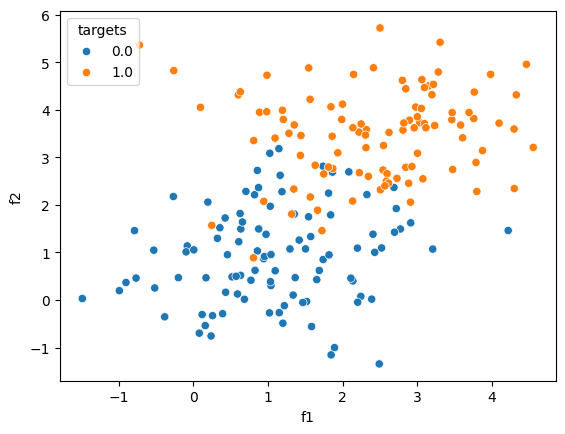

In [ ]:
sns.scatterplot(x='f1',y='f2',data=data,hue='targets')

As you can see, there are two clusters, but we will pretend that we do not know how many clusters there should be and know this value by ourselves using the elbow method.

## Finding the optimal number of clusters using the elbow method.

We will use K-means clustering algorithm.

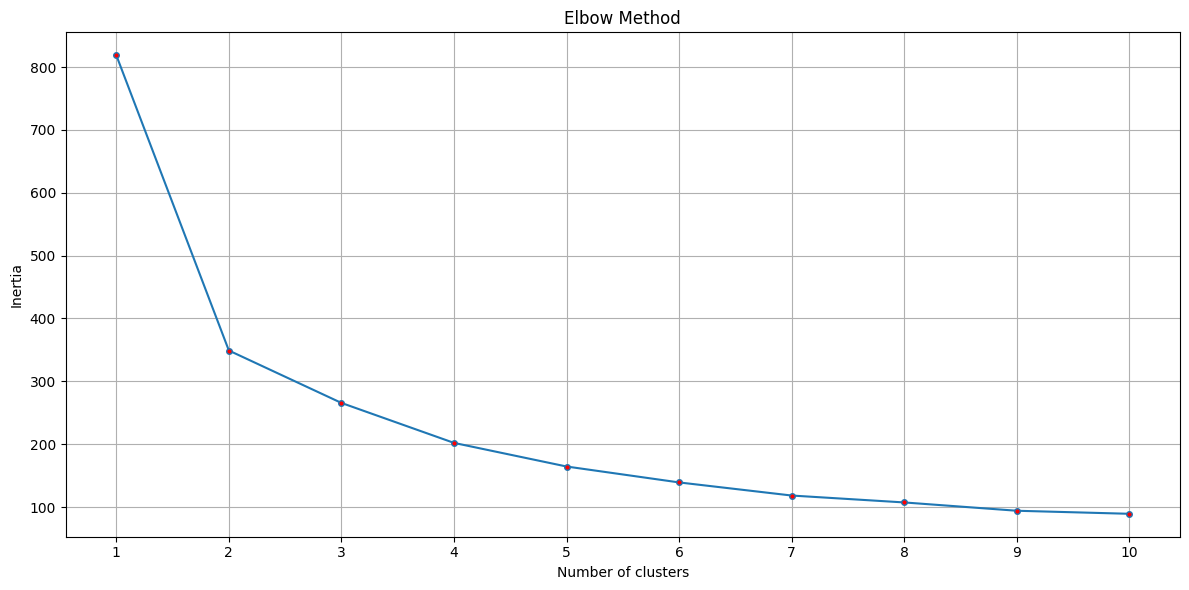

In [7]:
list_K = range(1,11)
inertia = []

for K in list_K:
    clt = KMeans(n_clusters=K,random_state=1)
    clt.fit(features)
    inertia.append(clt.inertia_)

plt.figure(figsize=(12,6))
plt.plot(list_K,inertia,marker='o',markersize=4,mfc='r',zorder=3)
plt.xticks(list_K)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.tight_layout()
plt.grid(zorder=1)
plt.show()

On the graph, you can see that as the number of clusters increases, the inertia decreases, meaning the distance between the points and the cluster centers also decreases, which is good. However, after 2 clusters, the inertia almost stops changing significantly. Therefore, 2 clusters represent the "elbow" point, so we will use this value.

## Construction of the model.

In [14]:
kmeans = KMeans(n_clusters=2,random_state=2)
kmeans.fit(features)
print(f'Cluster centers: {kmeans.cluster_centers_.tolist()},\nInetria: {kmeans.inertia_}')

Cluster centers: [[0.9779950800761218, 0.8021741715825683], [2.465405715770335, 3.486607484856841]],
Inetria: 348.9655117484038


## Comparison of model results with target values.

Evaluate the accuracy of the model.

In [17]:
y_pred = kmeans.labels_
print(f"Accuracy: {accuracy_score(targets,y_pred)}")

Accuracy: 0.895


Let's build graphs to evaluate the performance of the model.

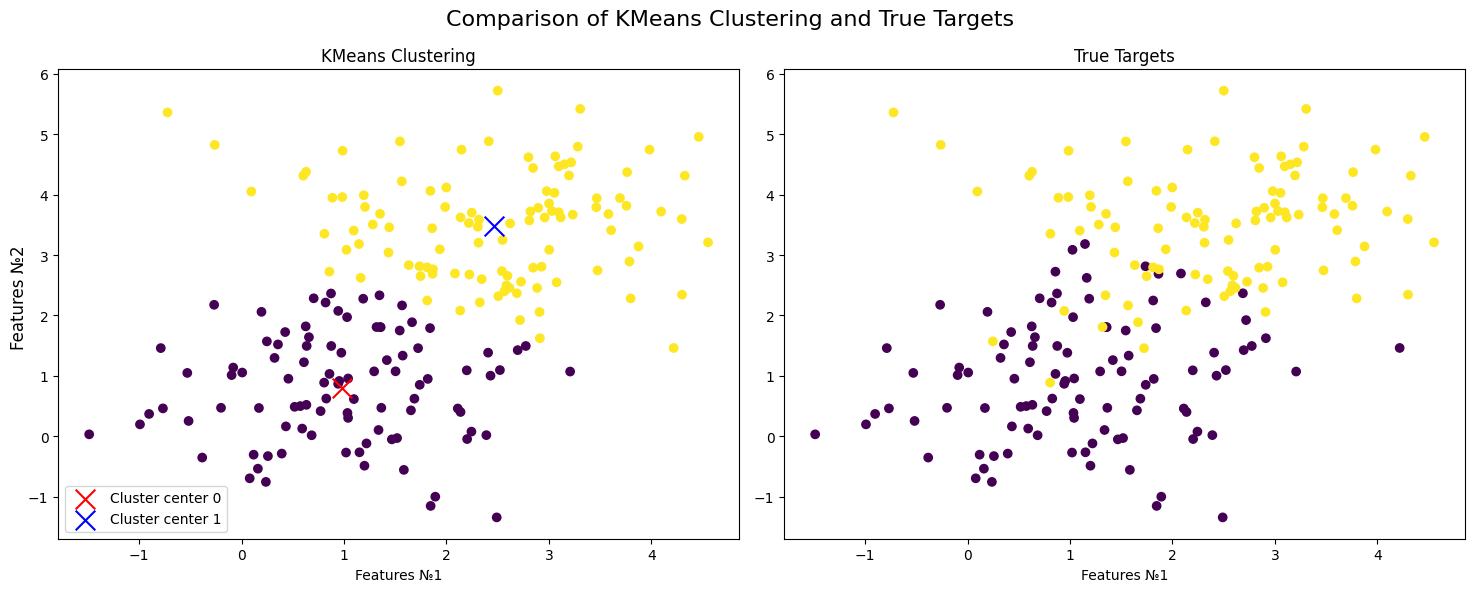

In [18]:
cluster_center1 = kmeans.cluster_centers_[0]
cluster_center2 = kmeans.cluster_centers_[1]

fig, axs = plt.subplots(ncols=2,figsize=(15,6))

axs[0].scatter(features['f1'],features['f2'],c=kmeans.labels_)
axs[0].set_title('KMeans Clustering')
axs[0].set_xlabel('Features №1')

axs[0].scatter(cluster_center1[0],cluster_center1[1],c='r',label='Cluster center 0',marker='x',s=200)
axs[0].scatter(cluster_center2[0],cluster_center2[1],c='b',label='Cluster center 1',marker='x',s=200)

axs[0].legend()


axs[1].scatter(features['f1'],features['f2'],c=targets)
axs[1].set_title('True Targets')
axs[1].set_xlabel('Features №1')

fig.suptitle('Comparison of KMeans Clustering and True Targets',fontsize=16)
fig.supylabel('Features №2')

plt.tight_layout()
plt.show()

## Conclusion.

The KMeans clustering algorithm generally gives a good result, accuracy = 89.5%, but its efficiency decreases in areas where data from different classes have a significant intersection. In these zones, instances from different classes do not have a clear boundary, which leads to mixing of clusters. Because KMeans is based on Euclidean distance and assumes that the clusters are spherical, it is not able to correctly distinguish between classes in such complex cases. This is its main disadvantage in similar clustering tasks.

Reduce the dimensionality of the data and build a clustering algorithm.